<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/11_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
import numpy as np
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE

df = pd.read_csv('dataAlter.csv')
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,-1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,-1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [64]:
names = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP','Target']
features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
target = 'Target'

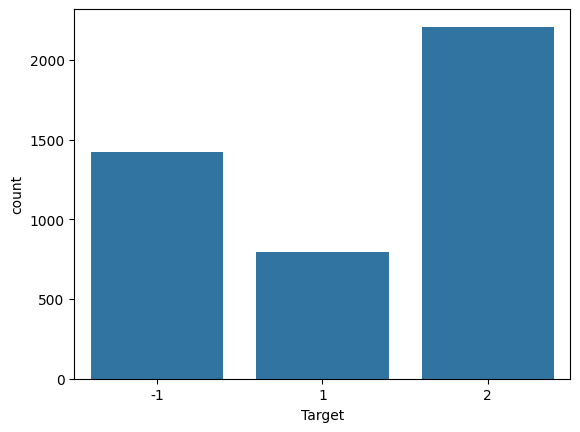

In [66]:
ax = sns.countplot(x="Target", data=df)

In [67]:
X = df.drop(['Target'], axis=1)
print(X.shape)

(4424, 36)


In [68]:
# Separating out the target
y = df.Target
print(y.shape)

(4424,)


In [69]:
 # Standardizing the features
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(3096, 36)
(1328, 36)


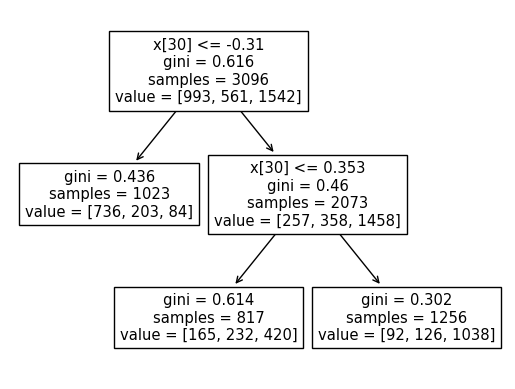

In [70]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.show()

In [71]:
predictions = clf.predict(X_test)
print(predictions)

[-1 -1  2 ...  2  2  2]


In [72]:
result = clf.score(X_test, y_test)
print('Acuraccy:')
print(result)

Acuraccy:
0.7206325301204819


## **Realizando Com Balanceamento de Classes**

Target
 2    2209
-1    1421
 1     794
Name: count, dtype: int64

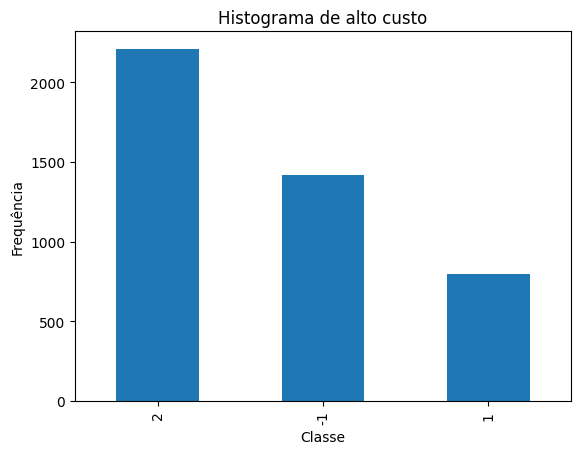

In [73]:
pd.value_counts(y).plot.bar()
plt.title('Histograma de alto custo')
plt.xlabel('Classe')
plt.ylabel('Frequência')
y.value_counts()

In [92]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE()


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = oversample.fit_resample(X, y)

X = X_sm
y = y_sm

Target
-1    2209
 2    2209
 1    2209
Name: count, dtype: int64

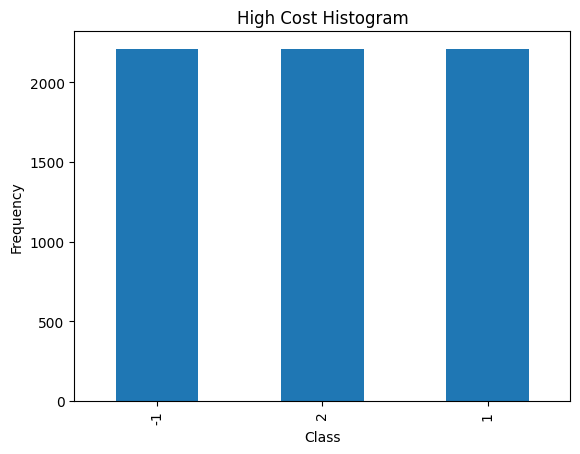

In [86]:
pd.value_counts(y).plot.bar()
plt.title('High Cost Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y)

In [93]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(4638, 36)
(1989, 36)


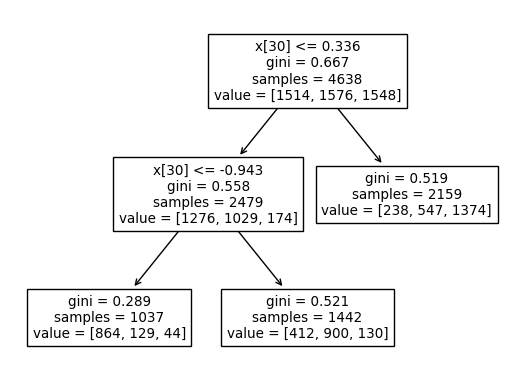

In [94]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.show()

In [95]:
predictions = clf.predict(X_test)
print(predictions)

[2 1 2 ... 2 1 1]


In [96]:
result = clf.score(X_test, y_test)
print('Acuraccy:')
print(result)

Acuraccy:
0.6591251885369532
